In [208]:
import os


In [209]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [210]:
os.chdir('/content/drive/MyDrive/Ph.D final_hackathon')

In [211]:
!pip install category_encoders

In [212]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
import gc
import category_encoders as ce

In [213]:
ls

'city sales.png'                       sample_submission-1638436274177.csv
 discount_features-1638436205304.csv   test_data-1638434844061.csv
 foot_fall-1638434879770.csv          'Top Medicine Year wise.png'
'medicine analysis.png'               'top meds city distribution.png'
'medicine sales.png'                   train_data-1638436039700.csv
'Percentage change in sales.png'       train_data.csv
 pred_sale.csv                         Untitled0.ipynb
'Sales Analysis.png'


In [214]:
train = pd.read_csv('train_data-1638436039700.csv',parse_dates={"sales_date":['year','month','day']},keep_date_col= True)
test=pd.read_csv('test_data-1638434844061.csv',parse_dates={"sales_date":['year','month','day']},keep_date_col=True)
footfall=pd.read_csv('foot_fall-1638434879770.csv')
disc_feat=pd.read_csv('discount_features-1638436205304.csv')

In [215]:
print(train.head())
print("\n")
print(train.tail())

  sales_date  year month day  city  medicine  sales
0 2015-01-02  2015     1   2     1         1   24.0
1 2015-01-02  2015     1   2     1         2  144.0
2 2015-01-02  2015     1   2     1         3   84.0
3 2015-01-02  2015     1   2     1         4   24.0
4 2015-01-02  2015     1   2     1         5    8.0


         sales_date  year month day  city  medicine  sales
22624340 2018-06-30  2018     6  30    10      3056    8.0
22624341 2018-06-30  2018     6  30    10      3163   16.0
22624342 2018-06-30  2018     6  30    10      3164    8.0
22624343 2018-06-30  2018     6  30    10      3157    4.0
22624344 2018-06-30  2018     6  30    10      3165   56.0


In [216]:
print(test.head())
print("\n")
print(test.tail())

  sales_date  id  year month day  city  medicine
0 2018-07-01   1  2018     7   1     1      1292
1 2018-07-01   2  2018     7   1     1         1
2 2018-07-01   3  2018     7   1     1         2
3 2018-07-01   4  2018     7   1     1         3
4 2018-07-01   5  2018     7   1     1         4


       sales_date      id  year month day  city  medicine
773530 2018-07-31  773531  2018     7  31    10      3163
773531 2018-07-31  773532  2018     7  31    10      3164
773532 2018-07-31  773533  2018     7  31    10      3157
773533 2018-07-31  773534  2018     7  31    10      3165
773534 2018-07-31  773535  2018     7  31    10      3057


In [217]:
#import IPython.display import display

In [218]:
pd.options.display.max_columns=None
#print(footfall.head())
footfall.tail()

,city,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,2015-01-11,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-17,2015-01-18,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-24,2015-01-25,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-01-31,2015-02-01,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-07,2015-02-08,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-14,2015-02-15,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-21,2015-02-22,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-02-28,2015-03-01,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-07,2015-03-08,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-14,2015-03-15,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-21,2015-03-22,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-28,2015-03-29,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-04,2015-04-05,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-11,2015-04-12,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-18,2015-04-19,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-25,2015-04-26,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-02,2015-05-03,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-09,2015-05-10,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-16,2015-05-17,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-23,2015-05-24,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-05-30,2015-05-31,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-13,2015-06-14,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-20,2015-06-21,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-27,2015-06-28,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2

In [219]:
print(disc_feat.head())
print("\n")
print(disc_feat.tail())

         date  city  medicine  discounted
0  2016-04-01     1         1           0
1  2016-04-01     1         2           0
2  2016-04-01     1         3           0
3  2016-04-01     1         4           0
4  2016-04-01     1         5           0


                date  city  medicine  discounted
17277944  2018-07-31    10      3163           0
17277945  2018-07-31    10      3164           0
17277946  2018-07-31    10      3157           0
17277947  2018-07-31    10      3165           0
17277948  2018-07-31    10      3057           0


In [220]:
print(train.shape)
print(test.shape)
print(footfall.shape)
print(disc_feat.shape)

(22624345, 7)
(773535, 7)
(10, 1268)
(17277949, 4)


In [221]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,"No of NAs":data.isna().sum(),
                        "No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [222]:
understand_data(train)

,Datatype,No of NAs,No of Levels,Levels
sales_date,datetime64[ns],0,1269,['2015-01-02T00:00:00.000000000' '2015-01-03T0...
year,object,0,4,['2015' '2016' '2017' '2018']
month,object,0,12,['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11'...
day,object,0,31,['2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12...
city,int64,0,10,[ 1 2 3 4 5 6 7 8 9 10]
medicine,int64,0,3389,[ 1 2 3 ... 3387 3388 3389]
sales,float64,0,175574,[ 24. 144. 84. ... 495.848 1194....


In [134]:
understand_data(disc_feat)

,Datatype,No of NAs,No of Levels,Levels
date,object,0,848,['2016-04-01' '2016-04-02' '2016-04-03' '2016-...
city,int64,0,10,[ 1 2 3 4 5 6 7 8 9 10]
medicine,int64,0,3396,[ 1 2 3 ... 3421 3422 3423]
discounted,int64,0,2,[0 1]


In [135]:
understand_data(footfall).head()

,Datatype,No of NAs,No of Levels,Levels
city,object,0,10,['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hy...
2015-01-02,float64,0,10,[ 9384. 16644. 19544. 16832. 13588. 13000. 139...
2015-01-03,float64,0,10,[ 6808. 14640. 13752. 13256. 11548. 11616. 121...
2015-01-04,float64,0,10,[ 8064. 15660. 13736. 14520. 11600. 11848. 127...
2015-01-05,float64,0,10,[10248. 19056. 19740. 17324. 16336. 12240. 144...


In [136]:
# converting data type of city from int to categorical as there are only 10 cities
train['city']=train.city.astype('category')

In [137]:
train.dtypes

sales_date    datetime64[ns]
year                  object
month                 object
day                   object
city                category
medicine               int64
sales                float64
dtype: object

In [138]:
#checking for  negative sales if any.
pd.options.display.max_rows=None
negatives=train[train['sales']<0]
negatives.head()

,sales_date,year,month,day,city,medicine,sales
17792,2015-01-03,2015,1,3,6,117,-32.32
73647,2015-01-08,2015,1,8,4,50,-8.00
83397,2015-01-09,2015,1,9,2,785,-4.00
85164,2015-01-09,2015,1,9,4,232,-8.00
86418,2015-01-09,2015,1,9,5,253,-40.00


In [139]:
negatives.shape

(1672, 7)

Merging train and discounted features

In [140]:
understand_data(disc_feat)

,Datatype,No of NAs,No of Levels,Levels
date,object,0,848,['2016-04-01' '2016-04-02' '2016-04-03' '2016-...
city,int64,0,10,[ 1 2 3 4 5 6 7 8 9 10]
medicine,int64,0,3396,[ 1 2 3 ... 3421 3422 3423]
discounted,int64,0,2,[0 1]


In [141]:
understand_data(train)

,Datatype,No of NAs,No of Levels,Levels
sales_date,datetime64[ns],0,1269,['2015-01-02T00:00:00.000000000' '2015-01-03T0...
year,object,0,4,['2015' '2016' '2017' '2018']
month,object,0,12,['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11'...
day,object,0,31,['2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12...
city,category,0,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\nCategories (1..."
medicine,int64,0,3389,[ 1 2 3 ... 3387 3388 3389]
sales,float64,0,175574,[ 24. 144. 84. ... 495.848 1194....


In [142]:
#converting variables of disc_feat to appropriate "Data Types" same as train data
disc_feat['city']=disc_feat.city.astype('category')
disc_feat['date']=disc_feat.date.astype('datetime64[ns]')

In [143]:
disc_feat.dtypes

date          datetime64[ns]
city                category
medicine               int64
discounted             int64
dtype: object

In [144]:
# Rename date in disc_feat to sales_date same as train data
disc_feat.rename(columns={'date':'sales_date'},inplace=True)

In [145]:
disc_feat.dtypes

sales_date    datetime64[ns]
city                category
medicine               int64
discounted             int64
dtype: object

In [146]:
disc_feat['discounted']=disc_feat['discounted'].astype('category')

In [147]:
disc_feat.dtypes

sales_date    datetime64[ns]
city                category
medicine               int64
discounted          category
dtype: object

In [148]:
#checking for duplicates in discounted features
disc_dup=disc_feat[disc_feat.duplicated()]

In [149]:
disc_dup.shape

(22009, 4)

In [150]:
disc_dup.drop_duplicates(keep='first',inplace=True)

In [151]:
print(disc_dup.head())
print("/n")
print(disc_dup.tail())

         sales_date city  medicine discounted
13494951 2018-02-28    1      1292          0
13494952 2018-02-28    1         1          0
13494953 2018-02-28    1         2          0
13494954 2018-02-28    1         3          0
13494955 2018-02-28    1         4          0
/n
         sales_date city  medicine discounted
13519035 2018-02-28   10      3054          0
13519036 2018-02-28   10      3055          0
13519037 2018-02-28   10      3163          0
13519038 2018-02-28   10      3164          0
13519040 2018-02-28   10      3165          0


In [152]:
gc.collect()

644

In [153]:
#merge discount and train
merged_train=pd.merge(train,disc_feat,how='left',on=['sales_date','city','medicine'])

In [154]:
# Create week day from the data
merged_train['day']=merged_train['sales_date'].dt.dayofweek

In [155]:
#merged_train.to_csv('train_data.csv',index=False)

In [156]:
merged_train.shape

(22669553, 8)

In [157]:
merged_train.head()

,sales_date,year,month,day,city,medicine,sales,discounted
0,2015-01-02,2015,1,4,1,1,24.0,NaN
1,2015-01-02,2015,1,4,1,2,144.0,NaN
2,2015-01-02,2015,1,4,1,3,84.0,NaN
3,2015-01-02,2015,1,4,1,4,24.0,NaN
4,2015-01-02,2015,1,4,1,5,8.0,NaN


In [158]:
merged_train.isna().sum()

sales_date          0
year                0
month               0
day                 0
city                0
medicine            0
sales               0
discounted    6119931
dtype: int64

In [159]:
# Fill na's with 0 
merged_train.discounted = merged_train['discounted'].fillna(0)

In [160]:
merged_train.isna().sum()

sales_date    0
year          0
month         0
day           0
city          0
medicine      0
sales         0
discounted    0
dtype: int64

In [161]:
understand_data(test)

,Datatype,No of NAs,No of Levels,Levels
sales_date,datetime64[ns],0,31,['2018-07-01T00:00:00.000000000' '2018-07-02T0...
id,int64,0,773535,[ 1 2 3 ... 773533 773534 773535]
year,object,0,1,['2018']
month,object,0,1,['7']
day,object,0,31,['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11'...
city,int64,0,10,[ 1 2 3 4 5 6 7 8 9 10]
medicine,int64,0,3289,[1292 1 2 ... 3422 3423 358]


In [162]:
understand_data(disc_feat)

,Datatype,No of NAs,No of Levels,Levels
sales_date,datetime64[ns],0,848,['2016-04-01T00:00:00.000000000' '2016-04-02T0...
city,category,0,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\nCategories (1..."
medicine,int64,0,3396,[ 1 2 3 ... 3421 3422 3423]
discounted,category,0,2,"[0, 1]\nCategories (2, int64): [0, 1]"


In [163]:
#convert city to categorical
test['city']=test.city.astype('category')

In [164]:
#merge test data and discount features
test_merged=pd.merge(test,disc_feat,how='left',on=['sales_date','city','medicine'])

In [165]:
# Create week day from data
test_merged['day']=test_merged['sales_date'].dt.dayofweek

In [166]:
test_merged.head()

,sales_date,id,year,month,day,city,medicine,discounted
0,2018-07-01,1,2018,7,6,1,1292,0
1,2018-07-01,2,2018,7,6,1,1,0
2,2018-07-01,3,2018,7,6,1,2,1
3,2018-07-01,4,2018,7,6,1,3,0
4,2018-07-01,5,2018,7,6,1,4,0


In [167]:
understand_data(test_merged)

,Datatype,No of NAs,No of Levels,Levels
sales_date,datetime64[ns],0,31,['2018-07-01T00:00:00.000000000' '2018-07-02T0...
id,int64,0,773535,[ 1 2 3 ... 773533 773534 773535]
year,object,0,1,['2018']
month,object,0,1,['7']
day,int64,0,7,[6 0 1 2 3 4 5]
city,category,0,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\nCategories (1..."
medicine,int64,0,3289,[1292 1 2 ... 3422 3423 358]
discounted,category,0,2,"[0, 1]\nCategories (2, int64): [0, 1]"


# Visualizations

In [168]:
from IPython.display import Image

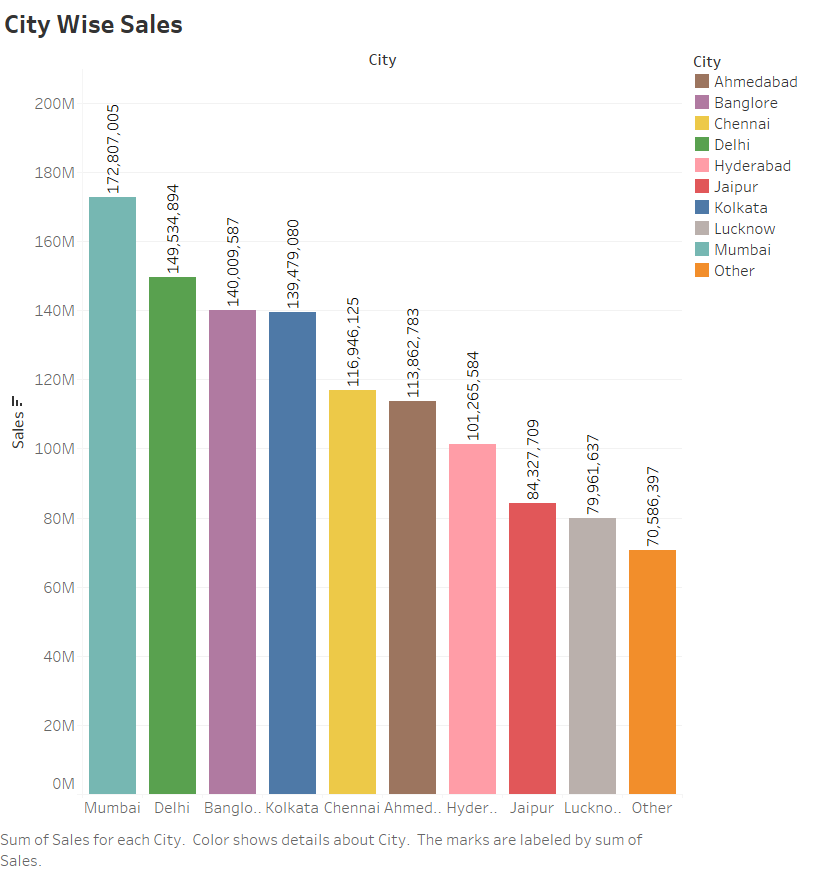

In [169]:
Image('city sales.png')

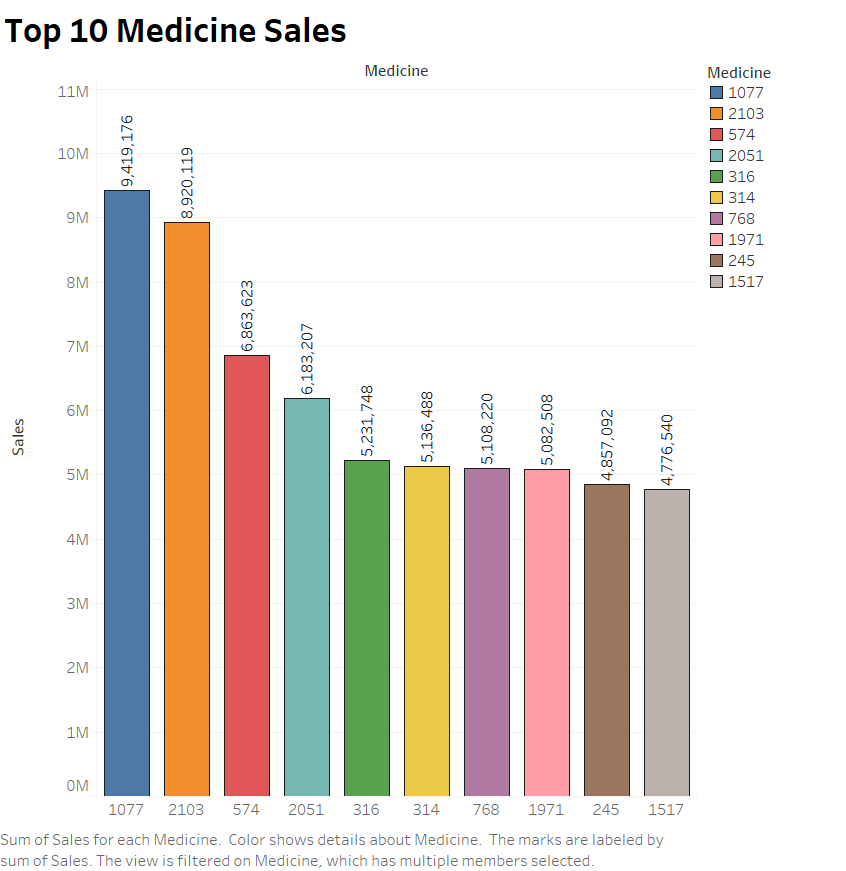

In [170]:
Image('medicine sales.png')

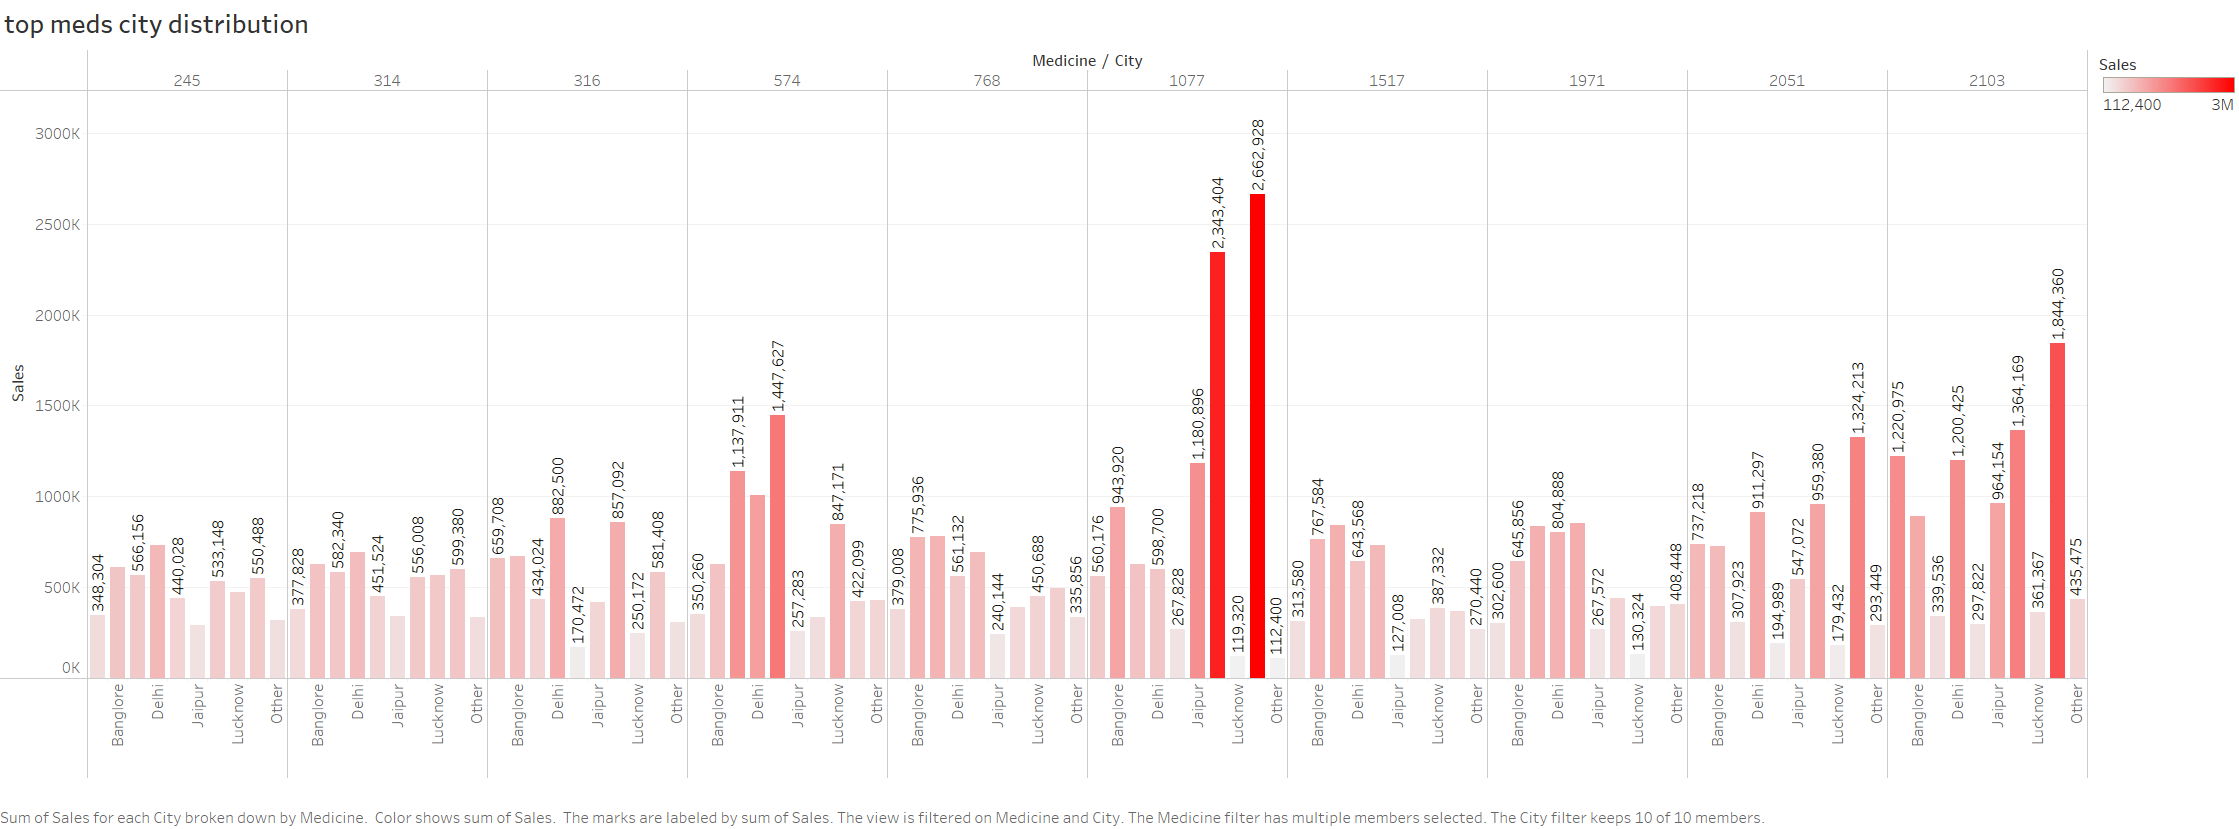

In [171]:
Image('top meds city distribution.png')

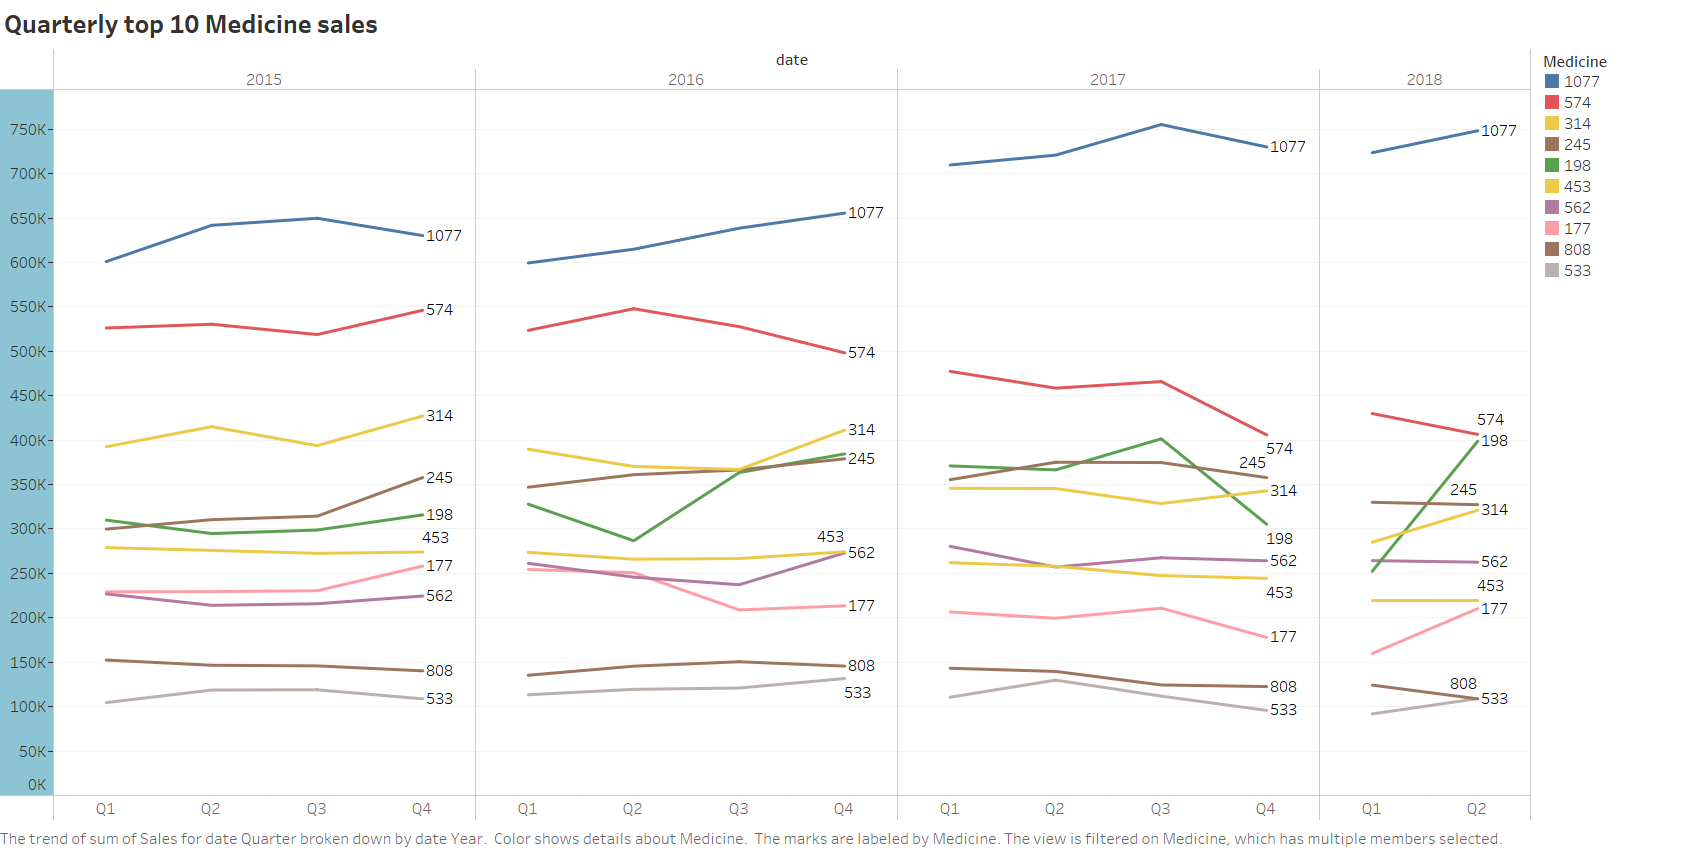

In [172]:
Image('Top Medicine Year wise.png')

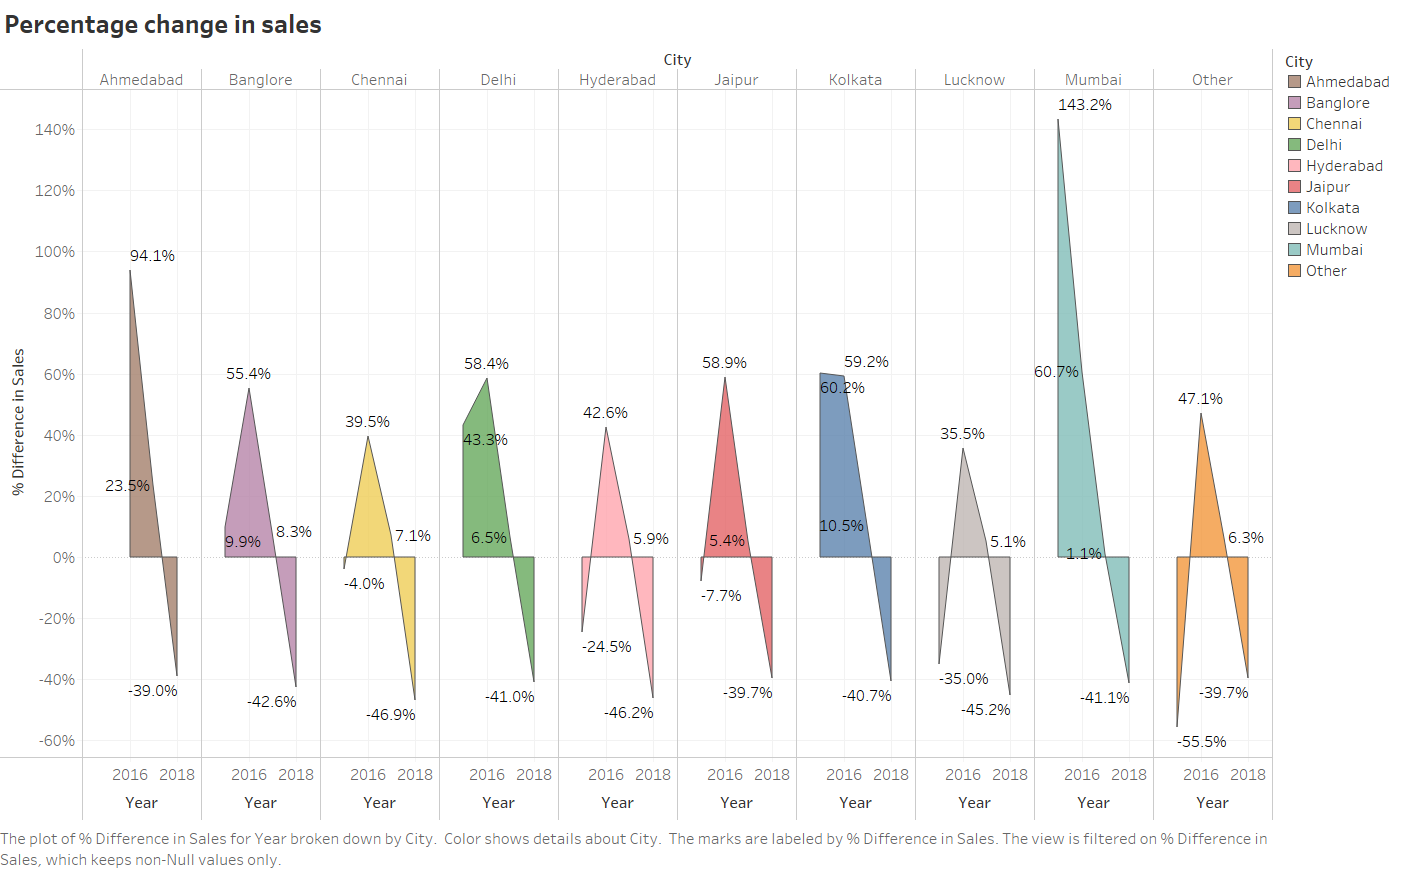

In [173]:
Image('Percentage change in sales.png')

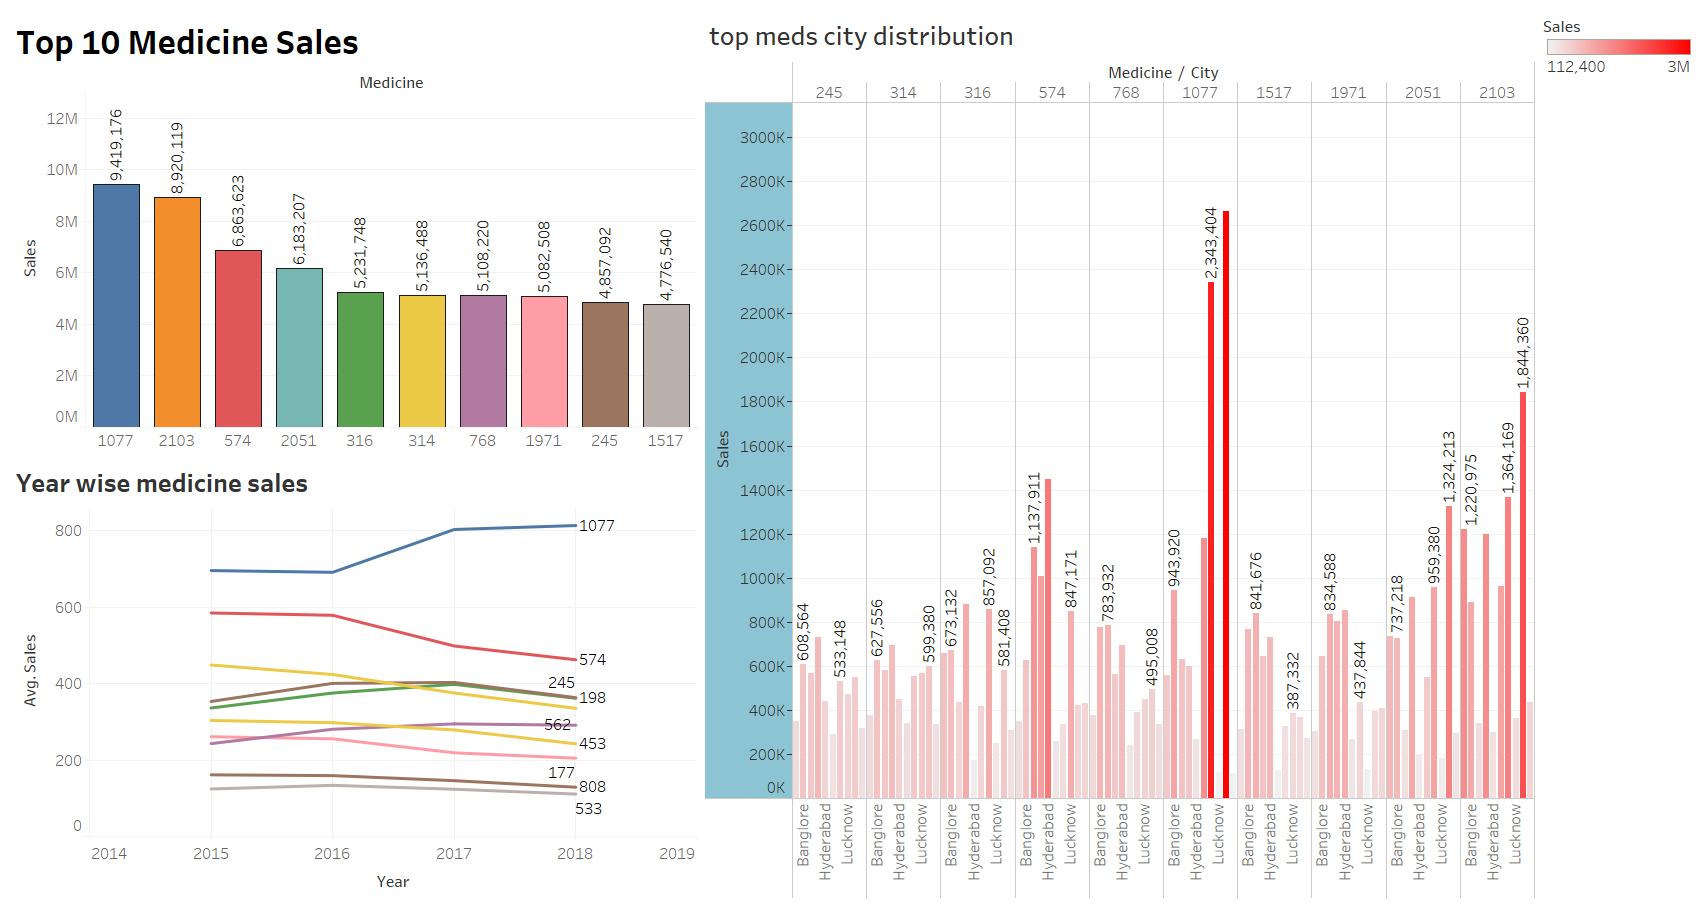

In [174]:
Image('medicine analysis.png')

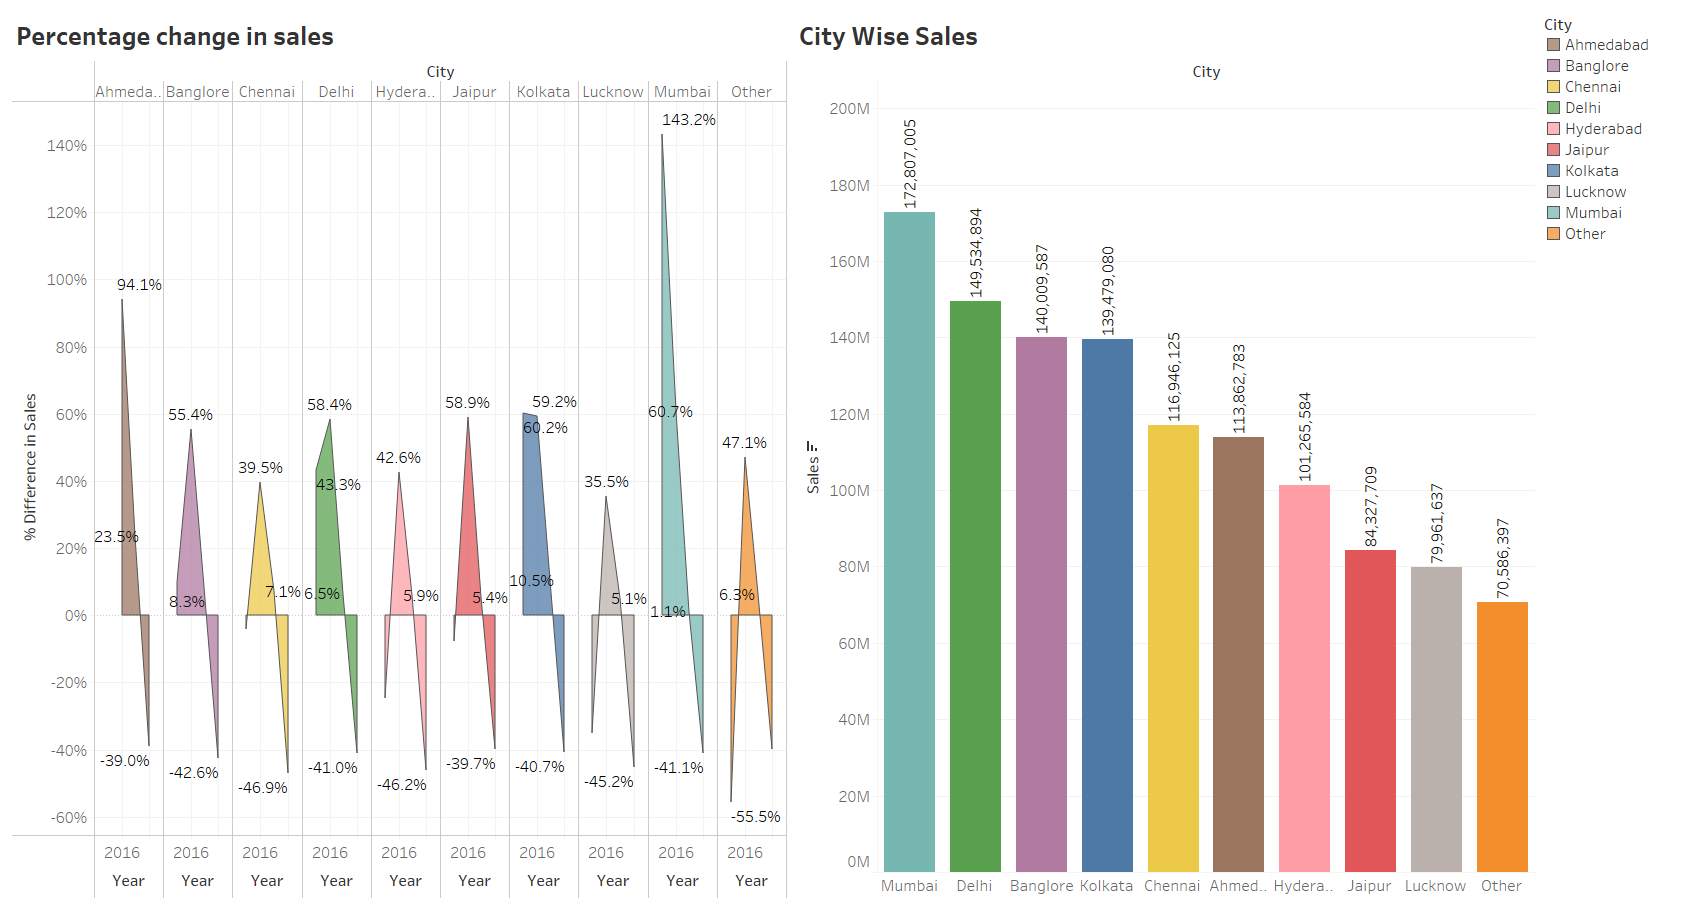

In [175]:
Image('Sales Analysis.png')

In [224]:
# Memory optimization function
def data_optimize(df, object_option=False):
    """Reduce the size of the input dataframe
    Parameters
    ----------
    df: pd.DataFrame
        input DataFrame
    object_option : bool, default=False
        if true, try to convert object to category
    Returns
    -------
    df: pd.DataFrame
        data type optimized output dataframe
    """

    # loop columns in the dataframe to downcast the dtype
    for col in df.columns:
        # process the int columns
        if df[col].dtype == 'int':
            col_min = df[col].min()
            col_max = df[col].max()
            # if all are non-negative, change to uint
            if col_min >= 0:
                if col_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif col_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif col_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                else:
                    df[col] = df[col]
            else:
                # if it has negative values, downcast based on the min and max
                if col_max < np.iinfo(np.int8).max and col_min > np.iinfo(np.int8).min:
                    df[col] = df[col].astype(np.int8)
                elif col_max < np.iinfo(np.int16).max and col_min > np.iinfo(np.int16).min:
                    df[col] = df[col].astype(np.int16)
                elif col_max < np.iinfo(np.int32).max and col_min > np.iinfo(np.int32).min:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col]
                    
        # process the float columns
        elif df[col].dtype == 'float':
            col_min = df[col].min()
            col_max = df[col].max()
            # downcast based on the min and max
            if col_min > np.finfo(np.float32).min and col_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col]

        if object_option:
            if df[col].dtype == 'object':
                if len(df[col].value_counts()) < 0.5 * df.shape[0]:
                    df[col] = df[col].astype('category')

    return df

In [225]:
understand_data(merged_train)

,Datatype,No of NAs,No of Levels,Levels
sales_date,datetime64[ns],0,1269,['2015-01-02T00:00:00.000000000' '2015-01-03T0...
year,object,0,4,['2015' '2016' '2017' '2018']
month,object,0,12,['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11'...
day,int64,0,7,[4 5 6 0 1 2 3]
city,category,0,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\nCategories (1..."
medicine,int64,0,3389,[ 1 2 3 ... 3387 3388 3389]
sales,float64,0,175574,[ 24. 144. 84. ... 495.848 1194....
discounted,category,0,2,"[0, 1]\nCategories (2, int64): [0, 1]"


In [226]:
# Function to understand the Datatypes , NA values, Unique values and there counts

def understand_data(data) :
  print('Data size :',data.shape)
  return(pd.DataFrame({"Datatype":data.dtypes,"No of NAs":data.isna().sum(),
                       "Unique_count":data.apply(lambda x: x.nunique(),axis=0),
                       "Unique_values":data.apply(lambda x: str(x.unique()),axis=0)}))


In [227]:
# Calculate memory usage

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

## **Model Building**

In [230]:
%%time
# Call the dataset for regression modeling

df = merged_train.copy()  # Train data
test_df = test_merged.copy()

df[['year', 'month', 'day', 'city','discounted']] = df[['year', 'month', 'day', 'city','discounted']].astype('category')
test_df[['year', 'month', 'day', 'city','discounted']] = test_df[['year', 'month', 'day', 'city','discounted']].astype('category')

df = data_optimize(df)  # optimize data
test_df = data_optimize(test_df)  # optimize data

print('Memory Usage for train_data (df ): ',mem_usage(df)) # memory used to load dataset
print('Memory Usage for test_data (test_df ): ',mem_usage(test_df)) # memory used to load dataset

Memory Usage for train_data (df ):  583.73 MB
Memory Usage for test_data (test_df ):  19.92 MB
CPU times: user 4.35 s, sys: 453 ms, total: 4.8 s
Wall time: 4.81 s


In [231]:
# Encoding the medicine column by using Mean Encoding

medicine_en = df.groupby(['medicine'])['sales'].mean().to_dict()  
df['medicine'] =  df['medicine'].map(medicine_en)  
# df['medicine'] =  df['medicine'].astype('category')
test_df['medicine'] =  test_df['medicine'].map(medicine_en)
# test_df['medicine'] =  test_df['medicine'].astype('category')

In [232]:
del medicine_en
gc.collect()

234

In [233]:
# Splitting Train data into Train and Val according to dates
train_df = df[(df['sales_date'] >= '2017-11-01') & (df['sales_date'] <= '2018-05-31')]  
val_df =  df[(df['sales_date'] > '2018-05-31')]

# Now drop date column from train, val data
train_df.drop('sales_date', axis = 1, inplace = True)
val_df.drop('sales_date', axis = 1, inplace =True)

print('train_df :', train_df.shape)
print('val_df :', val_df.shape)

train_df : (5180497, 7)
val_df : (724184, 7)


In [234]:
X_train = train_df.drop('sales', axis = 1)
y_train = train_df['sales']

X_test = val_df.drop('sales', axis = 1)
y_test = val_df['sales']

print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (5180497, 6)
y_train shape : (5180497,)
X_test shape : (724184, 6)
y_test shape : (724184,)


In [235]:
gc.collect()

44

In [236]:
X_train.dtypes

year          category
month         category
day           category
city          category
medicine       float64
discounted    category
dtype: object

In [237]:
#One Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[['year', 'month', 'day', 'city']]), columns = ohe.get_feature_names())

X_test_cat = pd.DataFrame(ohe.transform(X_test[['year', 'month', 'day', 'city']]), columns = ohe.get_feature_names())

In [238]:
gc.collect()
num = ['medicine','discounted']
print(X_train[num].reset_index(drop = True).shape)
print(X_test[num].reset_index(drop = True).shape)
print(X_train_cat.shape)
print(X_test_cat.shape)

(5180497, 2)
(724184, 2)
(5180497, 26)
(724184, 26)


In [239]:
X_test_cat.head()

,x0_2017,x0_2018,x1_1,x1_11,x1_12,x1_2,x1_3,x1_4,x1_5,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x3_1,x3_2,x3_3,x3_4,x3_5,x3_6,x3_7,x3_8,x3_9,x3_10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
gc.collect()

202

In [241]:
#Join one hot encoded columns with medicine and discount
X_train = X_train_cat.join(X_train[num].reset_index(drop = True))

In [242]:
del df
gc.collect()

100

In [243]:
#Join one hot encoded columns with medicine and discount
X_test = X_test_cat.join(X_test[num].reset_index(drop = True))

In [244]:
gc.collect()
del X_train_cat, X_test_cat

In [245]:
X_train = data_optimize(X_train)

In [246]:
X_test = data_optimize(X_test)

## **Decision** Tree

In [247]:
%%time
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor() 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
gc.collect()

CPU times: user 53 s, sys: 1.76 s, total: 54.7 s
Wall time: 55.4 s


In [248]:
gc.collect()

53

In [249]:
%%time
# test the output on validation data
train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

CPU times: user 4.33 s, sys: 38 ms, total: 4.36 s
Wall time: 4.34 s


In [251]:
%%time
y_t = y_test.copy().values
print(y_t)
y_pred

[ 4. 32. 32. ...  8.  4. 56.]
CPU times: user 1.01 ms, sys: 1.71 ms, total: 2.72 ms
Wall time: 2.03 ms


In [252]:
%%time
from sklearn.metrics import mean_squared_error
print('RMSE : ', mean_squared_error(y_test, y_pred , squared=False) )
print('RMSE : ', mean_squared_error(y_train, train_pred , squared=False) ) 
# squaredbool, default=True
# If True returns MSE value, if False returns RMSE value.

RMSE :  56.868649649649804
RMSE :  67.64872062064697
CPU times: user 56 ms, sys: 1.91 ms, total: 57.9 ms
Wall time: 60.6 ms


In [207]:
gc.collect()

203

 Test the model

In [80]:
test_df.head()

,sales_date,id,year,month,day,city,medicine,discounted
0,2018-07-01,1,2018,7,6,1,25.636864,0
1,2018-07-01,2,2018,7,6,1,23.158218,0
2,2018-07-01,3,2018,7,6,1,77.015923,1
3,2018-07-01,4,2018,7,6,1,132.946579,0
4,2018-07-01,5,2018,7,6,1,25.095322,0


In [81]:
test_df.dtypes

sales_date    datetime64[ns]
id                    uint32
year                category
month               category
day                 category
city                category
medicine             float64
discounted          category
dtype: object

In [82]:
test_df_cat = pd.DataFrame(ohe.transform(test_df[['year', 'month', 'day', 'city']]), columns = ohe.get_feature_names())
test_df_cat.head()

,x0_2017,x0_2018,x1_1,x1_10,x1_11,x1_12,x1_2,x1_3,x1_4,x1_5,x1_6,x1_7,x1_8,x1_9,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x3_1,x3_2,x3_3,x3_4,x3_5,x3_6,x3_7,x3_8,x3_9,x3_10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
num = ['medicine','discounted']

test_df_dt = test_df_cat.join(test_df[num].reset_index(drop = True))

In [84]:
# optimize the data 
test_df_dt = data_optimize(test_df_dt)   

In [85]:
gc.collect()

305

In [86]:
test_df_dt.shape

(773535, 33)

In [87]:
test_dt_copy = test_df_dt.copy()

In [88]:
test_dt_copy['medicine'].fillna(X_train['medicine'].mean(), inplace = True)

In [89]:
test_dt_copy['medicine'].isna().sum()

0

In [90]:
gc.collect()

176

In [91]:
# test the output on test data

test_with_dt_output = regressor.predict(test_dt_copy)
test_with_dt_output

array([20., 15., 52., ..., 12., 12., 18.])

In [93]:
sample_sub = pd.read_csv('sample_submission-1638436274177.csv')

In [94]:
sample_sub['sales'] = test_with_dt_output
sample_sub.head()

,id,sales
0,1,20.0
1,2,15.0
2,3,52.0
3,4,45.0
4,5,16.8


In [95]:
sample_sub.to_csv('pred_sale.csv',index=False)